<a href="https://colab.research.google.com/github/akhilbonagiri8465/Prediction-Using-Supervised-ML/blob/main/Spark_Foundation_(Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AKHIL BONAGIRI

# GRIP - the spark foundation

# TASK-1: Prediction Using Supervised ML

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading the dataset

In [4]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported")
dataset

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


first five elements in dataset:

In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
dataset.shape

(25, 2)

Data Visualization

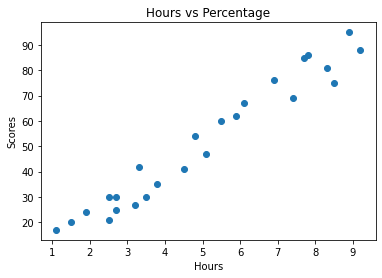

In [9]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Traning of model

In [34]:
a=dataset.iloc[:, :-1].values
b=dataset.iloc[:, 1].values

In [35]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.2,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(a_train, b_train)

LinearRegression()

Plotting

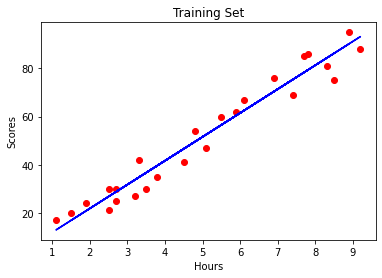

In [37]:
line = regressor.coef_*a+regressor.intercept_

plt.title("Training Set");
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(a, b,color="red")
plt.plot(a, line,color="blue");
plt.show()

Predicting and Comparing

In [38]:
print(a_test)
b_pred = regressor.predict(a_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [39]:
df = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [40]:
print('Training Score :', regressor.score(a_train, b_train))
print("Testing Score :", regressor.score(a_test, b_test))

Training Score : 0.9515510725211552
Testing Score : 0.9454906892105354


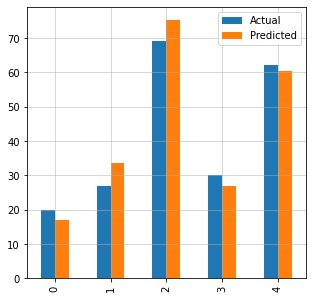

In [46]:
df.plot(kind="bar", figsize=(5,5))
plt.grid(which = 'major', linewidth='0.5')
plt.grid(which = 'minor', linewidth='0.5')

In [48]:
Hours = 9.25
test=np.array([Hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours =",Hours)
print("Predicted Score =",own_pred[0])

No of Hours = 9.25
Predicted Score = 93.69173248737539


Final Step

In [49]:
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(b_test, b_pred))
print('Mean Squared Error :',metrics.mean_squared_error(b_test, b_pred))
print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(b_test, b_pred)))
print('R-2 :',metrics.r2_score(b_test, b_pred))

Mean Absolute Error : 4.183859899002982
Mean Squared Error : 21.598769307217456
Root Mean Squared Error : 4.647447612100373
R-2 : 0.9454906892105354
